<p align="center">
  <img src="https://cdn.discordapp.com/attachments/866352513942814721/954394117339754536/mafqud.png" />
</p>

#  MafQud Missing People Analysis

MafQud Graduation Project Team. All rights reserved © 2022

## Description
Analyzing the data we have scrapped from [Atfal Mafkoda | أطفال مفقودة Website](https://atfalmafkoda.com/) to see if we can make use of it in our decisions for building the app and the face recognition model.  

## Dataset

### Overview 
The data was scrapped and saved in a `JSON` file called `atfal_missing_people.json`. You can download it from [here](https://drive.google.com/file/d/1pmolVeLWWwXz1HgRe_TS7a6hR9E5VGv0/view?usp=sharing)

### Data Dictionary
| Variable   |      Data Type      |  Definition  |
|:------------|:-------------------|:-------------|
| id |  Integer (int) | A unique identification number for each case to identify |
| name_arabic |  String-textual- (object) | The Arabic name for the case |
| name_english |    String-textual- (object)   |   The English name for the case |
| government_arabic | String-categorical- (object)  |    The Arabic name for the government of the case |
| government_english | String-categorical- (object) |   The English name for the government of the case  |
| missing_date | Date (object) |   The date when tha case was missed |
| current_age | Integer (int) |    The expected current age for the case (till the day of recording the data on Atfal website) |
| imageRef | String (object) |    A reference for the first scrapped image for the case |
| number_of_images | Integer (int) |    # images that were scrapped for each case  |
| missing_date_ar | String (object) |    The Arabic date when tha case was missed |
| missing_date_en | Datetime (object) |    The English date when tha case was missed |
| day | Float (float) |    The day when tha case was missed |
| month | Float (float) |    The month when tha case was missed |
| year | Float (float) |    The year when tha case was missed |

### Main Goal of the Analysis
1. Build decisions about the app and how to handle cases based on the analysis. 
2. Help building the face detection model on a more accurate and reliable data. 
3. Investigate on some events and facts about the data. 
4. Help us on our research, facts and numbers & statistics. 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
plt.style.use('fivethirtyeight')
sns.set_context('notebook', font_scale=1)
mafqud_palette = ['#1a234a', '#1275f7', '#37c8fd', '#a5e7ff', '#ff613d']

%matplotlib inline

### Data Overview 

In [3]:
missing = pd.read_json('atfal_missing_people.json')
missing.set_index('id', inplace=True)
missing.head()

,name_arabic,name_english,government_arabic,government_english,missing_date,current_age,imageRef,number_of_images,missing_date_ar,missing_date_en,day,month,year
id,,,,,,,,,,,,,
1,داليا محمد نبقه,Dalia Mhmd Nbqh,الغربيه,Gharbia,٢٠‏/٠٩‏/٢٠١١,11,0001_0.jpg,1,٢٠-٠٩-٢٠١١,2011-09-20T00:00:00.000Z,20.0,9.0,2011.0
2,سلمي احمد مصطفي,Slmi Ahmd Mstfi,مفقود,Null,٢٢‏/٠٥‏/٢٠١٣,13,0002_0.jpg,14,٢٢-٠٥-٢٠١٣,2013-05-22T00:00:00.000Z,22.0,5.0,2013.0
3,مؤمن اسلام محمد قمبر,Moumn Aslam Mhmd Qmbr,مفقود,Null,١٤‏/٠٦‏/٢٠١٤,10,0003_0.jpg,5,١٤-٠٦-٢٠١٤,2014-06-14T00:00:00.000Z,14.0,6.0,2014.0
4,ندا تامر عبد النبي,Nda Tamr Abd Alnbi,القليوبيه,Qualyubia,٢١‏/٠٧‏/٢٠١٥,12,0004_0.jpg,3,٢١-٠٧-٢٠١٥,2015-07-21T00:00:00.000Z,21.0,7.0,2015.0
5,مازن طارق حسن السمالوطي,Mazn Tarq Hsn Alsmalouti,المنيا,Minya,١٢‏/١١‏/٢٠١٠,17,0005_0.jpg,8,١٢-١١-٢٠١٠,2010-12-11T00:00:00.000Z,11.0,12.0,2010.0


In [4]:
missing.shape

(1608, 13)

We have data for +1600 missing case in Egypt from "Atfal Mafkoda | أطفال مفقودة" website

In [5]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 1 to 1698
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name_arabic         1608 non-null   object 
 1   name_english        1608 non-null   object 
 2   government_arabic   1608 non-null   object 
 3   government_english  1608 non-null   object 
 4   missing_date        1608 non-null   object 
 5   current_age         1608 non-null   int64  
 6   imageRef            1608 non-null   object 
 7   number_of_images    1608 non-null   int64  
 8   missing_date_ar     1608 non-null   object 
 9   missing_date_en     1607 non-null   object 
 10  day                 1607 non-null   float64
 11  month               1607 non-null   float64
 12  year                1607 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 175.9+ KB


In [6]:
missing.isna().sum()

name_arabic           0
name_english          0
government_arabic     0
government_english    0
missing_date          0
current_age           0
imageRef              0
number_of_images      0
missing_date_ar       0
missing_date_en       1
day                   1
month                 1
year                  1
dtype: int64

In [7]:
missing[missing.isnull().any(axis=1)] 

,name_arabic,name_english,government_arabic,government_english,missing_date,current_age,imageRef,number_of_images,missing_date_ar,missing_date_en,day,month,year
id,,,,,,,,,,,,,
180,رضا حافظ ابراهيم عبد المعطي,Rda Hafth Abrahim Abd Almati,مفقود,Null,(لم يحدد),24,0180_0.jpg,1,,None,NaN,NaN,NaN


There are 1608 rows, only one has 4 null values

### Data Wrangling

In [8]:
# Change the datatype of missing_date_en attribute
missing['missing_date_en'] = pd.to_datetime(missing['missing_date_ar']) 
missing.head(3)

,name_arabic,name_english,government_arabic,government_english,missing_date,current_age,imageRef,number_of_images,missing_date_ar,missing_date_en,day,month,year
id,,,,,,,,,,,,,
1,داليا محمد نبقه,Dalia Mhmd Nbqh,الغربيه,Gharbia,٢٠‏/٠٩‏/٢٠١١,11,0001_0.jpg,1,٢٠-٠٩-٢٠١١,2011-09-20,20.0,9.0,2011.0
2,سلمي احمد مصطفي,Slmi Ahmd Mstfi,مفقود,Null,٢٢‏/٠٥‏/٢٠١٣,13,0002_0.jpg,14,٢٢-٠٥-٢٠١٣,2013-05-22,22.0,5.0,2013.0
3,مؤمن اسلام محمد قمبر,Moumn Aslam Mhmd Qmbr,مفقود,Null,١٤‏/٠٦‏/٢٠١٤,10,0003_0.jpg,5,١٤-٠٦-٢٠١٤,2014-06-14,14.0,6.0,2014.0


In [9]:
# Drop "imageRef" attribute 
missing.drop(['imageRef', 'missing_date'], axis=1, inplace=True)

In [10]:
# Change day, month, year columns to int
missing.fillna(0, inplace=True)
convert_dict = {'day': int,
                'month': int,
                'year': int}  

missing = missing.astype(convert_dict)  
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 1 to 1698
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name_arabic         1608 non-null   object
 1   name_english        1608 non-null   object
 2   government_arabic   1608 non-null   object
 3   government_english  1608 non-null   object
 4   current_age         1608 non-null   int64 
 5   number_of_images    1608 non-null   int64 
 6   missing_date_ar     1608 non-null   object
 7   missing_date_en     1608 non-null   object
 8   day                 1608 non-null   int32 
 9   month               1608 non-null   int32 
 10  year                1608 non-null   int32 
dtypes: int32(3), int64(2), object(6)
memory usage: 131.9+ KB


In [11]:
missing.describe(include=['O'])

,name_arabic,name_english,government_arabic,government_english,missing_date_ar,missing_date_en
count,1608,1608,1608,1608,1608,1608
unique,1595,1590,26,25,1133,1133
top,عبد الرحمن حمدي سعد امين,Fadi Khmis Slamh Basha Albraoui,مفقود,Null,٠١-٠١-١٩٧٠,1970-01-01 00:00:00
freq,2,2,518,518,40,40


### Investigating on `name_arabic` & `name_english` of missing cases

In [12]:
# See if there are duplicated names 
columns_names = ['name_arabic','name_english']
duplicates = missing.duplicated(subset = columns_names, keep = False)
missing[duplicates].sort_values(by='name_arabic')

,name_arabic,name_english,government_arabic,government_english,current_age,number_of_images,missing_date_ar,missing_date_en,day,month,year
id,,,,,,,,,,,
700,ابراهيم احمد الغباشي,Abrahim Ahmd Alghbashi,دمياط,Damietta,12,2,٢١-٠٣-٢٠٢٠,2020-03-21 00:00:00,21,3,2020
701,ابراهيم احمد الغباشي,Abrahim Ahmd Alghbashi,دمياط,Damietta,12,2,٢١-٠٣-٢٠٢٠,2020-03-21 00:00:00,21,3,2020
319,احمد صبحي محمد,Ahmd Sbhi Mhmd,مفقود,Null,22,1,٠١-٠٣-٢٠١٦,2016-01-03 00:00:00,3,1,2016
1320,احمد صبحي محمد,Ahmd Sbhi Mhmd,المنوفيه,Menofia,0,1,٠٣-٠٣-٢٠١٦,2016-03-03 00:00:00,3,3,2016
308,احمد فتحي محمد منصور,Ahmd Fthi Mhmd Mnsour,مفقود,Null,26,1,٠١-٠٨-٢٠١٢,2012-01-08 00:00:00,8,1,2012
865,احمد فتحي محمد منصور,Ahmd Fthi Mhmd Mnsour,سوهاج,Sohag,0,1,٠١-٠٨-٢٠١٢,2012-01-08 00:00:00,8,1,2012
1442,احمد كمال عبد الستار,Ahmd Kmal Abd Alstar,بني سويف,Beni Suef,34,1,٠٢-٠٢-٢٠٠٧,2007-02-02 00:00:00,2,2,2007
1430,احمد كمال عبد الستار,Ahmd Kmal Abd Alstar,بني سويف,Beni Suef,34,1,٠١-٠٢-٢٠٠٧,2007-01-02 00:00:00,2,1,2007
1386,اسماعيل احمد اسماعيل,Asmaail Ahmd Asmaail,القاهرة,Cairo,0,2,٢٨-١٠-٢٠٢٠,2020-10-28 00:00:00,28,10,2020


####  Are there duplicated names?
* There are 13 duplicated names. 

#### Is this a typo or different entry dates? 
* It is likely different entry dates. 

### Investigating on `government_arabic` & `government_english` of missing cases

In [13]:
missing['government_english'].unique()

array(['Gharbia', 'Null', 'Qualyubia', 'Minya', 'Cairo', 'Dakahlia',
       'Alexandria', 'Red Sea', 'Assiut', 'Al-Sharqia', 'Fayoum', 'Sohag',
       'Port Said', 'Giza', 'Suez', 'Beni Suef', 'Menofia', 'Damietta',
       'Luxor', 'Beheira', 'Kafr el-Sheikh', 'Qena', 'North Sinai',
       'Aswan', 'Matrouh'], dtype=object)

In [14]:
missing['government_arabic'].unique()

array(['الغربيه', 'مفقود', 'القليوبيه', 'المنيا', 'القاهرة', 'الدقهلية',
       'الاسكندريه', 'البحر الأحمر', 'أسيوط', 'الشرقيه', 'الفيوم',
       'سوهاج', 'بور سعيد', 'الجيزه', 'السويس', 'بني سويف', 'المنوفيه',
       'دمياط', 'الأقصر', 'البحيرة', 'كفر الشيخ', 'قنا', 'جنوب سيناء',
       'أسوان', 'بورسعيد', 'مرسى مطروح'], dtype=object)

The govenment: 'بور سعيد' is separated into two distincts: 'بور سعيد' and 'بورسعيد' --> we will make them one which is 'بور سعيد'

In [15]:
missing['government_arabic'].replace({'بورسعيد': 'بور سعيد'}, inplace=True)
missing['government_arabic'].unique()

array(['الغربيه', 'مفقود', 'القليوبيه', 'المنيا', 'القاهرة', 'الدقهلية',
       'الاسكندريه', 'البحر الأحمر', 'أسيوط', 'الشرقيه', 'الفيوم',
       'سوهاج', 'بور سعيد', 'الجيزه', 'السويس', 'بني سويف', 'المنوفيه',
       'دمياط', 'الأقصر', 'البحيرة', 'كفر الشيخ', 'قنا', 'جنوب سيناء',
       'أسوان', 'مرسى مطروح'], dtype=object)

In [16]:
pd.DataFrame(missing['government_arabic'].value_counts())

,government_arabic
مفقود,518
الجيزه,158
القاهرة,158
المنيا,92
الاسكندريه,76
القليوبيه,72
الشرقيه,67
سوهاج,62
الدقهلية,55
أسيوط,54


In [17]:
pd.DataFrame(missing['government_english'].value_counts())

,government_english
Null,518
Giza,158
Cairo,158
Minya,92
Alexandria,76
Qualyubia,72
Al-Sharqia,67
Sohag,62
Dakahlia,55
Assiut,54


In [18]:
gov_null = (missing['government_english'] == 'Null').sum()
print(f'Percentage of unknown government of our dataset: {gov_null/missing.shape[0] * 100:.1f}%')

Percentage of unknown government of our dataset: 32.2%


There are 518 missing case has unknown resident location (government info is null). This represents 32.2% of our data.   

In [19]:
missing_unknown = missing.replace({'Null':'Unknown'})
gov_order = missing_unknown['government_english'].value_counts().index

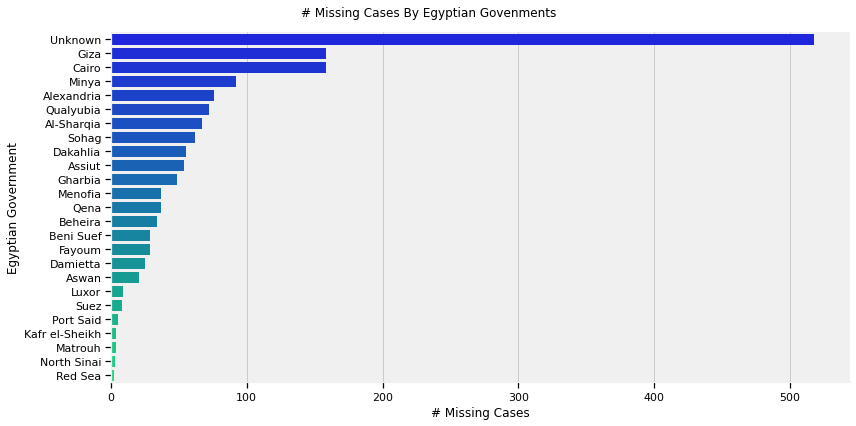

In [20]:
g = sns.catplot(y='government_english', data=missing_unknown, order=gov_order, 
                kind='count', height=6, aspect=2, palette='winter')
g.fig.suptitle('# Missing Cases By Egyptian Govenments')
g.set(xlabel='# Missing Cases', ylabel='Egyptian Government')
plt.tight_layout()
plt.show()

##### Top 3 Egyptian governments that have most missing cases: 
1. Giza
2.Cairo  
3. Minya

#### Side Decisions/Suggestions:
1. We can impute the unknown govrnments with these top 3 governments (or top 2). 
2. We can make the same logic that will help us to build a heat map in our application to highlight where the most cases come from to keep people in these areas notified and warned.
3. Build "Filter by Area/Government" on filters section on the app. 

So, we can make a section for the user telling him: 

##### **"إذا كنت من سكان هذه المناطق/المحافظات فخذ حذرك، حيث تكثر حالات ضياع/فقد الأطفال في هذه المنطقة/المحافظة، حفظ الله أحبابكم من كل سوء"**

### Investigate on `current_age` of missing cases

In [21]:
missing['current_age'].unique()

array([11, 13, 10, 12, 17, 29, 21, 14, 15, 22, 35, 28, 20,  5,  9, 26, 18,
       19,  8,  6, 16, 27, 31, 37, 47, 23, 25, 30, 44, 24, 45, 39, 36, 32,
       58, 51, 41, 43,  0, 54, 48, 65, 34, 40, 33, 46, 38, 55, 60, 57, 42,
       59,  7,  3, 52, 62, 69,  4,  1, 49, 53], dtype=int64)

There are missing cases for children with age = 0, this means that they are **still babies** (age less than year).

In [22]:
pd.DataFrame(missing['current_age'].describe())

,current_age
count,1608.000000
mean,10.274876
std,14.087258
min,0.000000
25%,0.000000
50%,0.000000
75%,18.000000
max,69.000000


The age missing cases ranges from 0 (babies) to 69 (elderly).

The Mean & Median for the cases: 

In [23]:
print('Missing cases with age >= 0 (with babies): ') 
print(f'Mean: {missing["current_age"].mean():.2f}')
print(f'Median: {missing["current_age"].median():.2f}')

Missing cases with age >= 0 (with babies): 
Mean: 10.27
Median: 0.00


In [24]:
missing_no = missing.loc[missing['current_age'] != 0]
print('Missing cases with age > 0 (not babies): ') 
print(f'Mean: {missing_no["current_age"].mean():.2f}')
print(f'Median: {missing_no["current_age"].median():.2f}')

Missing cases with age > 0 (not babies): 
Mean: 23.11
Median: 20.00


In [25]:
missing_0 = (missing['current_age'] == 0).sum()
print(f'Number of missing cases that have age = 0 (still babies): {missing_0}')
print(f'Their percentage of the data: {missing_0/missing.shape[0]*100:.1f}%')

Number of missing cases that have age < 0 (still babies): 893
Their percentage of the data: 55.5%


##### There are +800 missing cases that are still babies are. This represents **55.5%** of the reported cases.

In [26]:
disp_long = (missing.current_age > 40.0).sum()
print(f'Number of missing people who either are missing from long time or having disabilities (Alzahimer, ..): {disp_long}')
print(f'Percentage: {disp_long/missing.shape[0]*100:.2}%')

Number of missing people who either are missing from long time or having disabilities (Alzahimer, ..): 75
Percentage: 4.7%


There are **75 cases** that are either missing from long time or having disabilities (Alzahimer, ..). They represents **4.7%** of the data

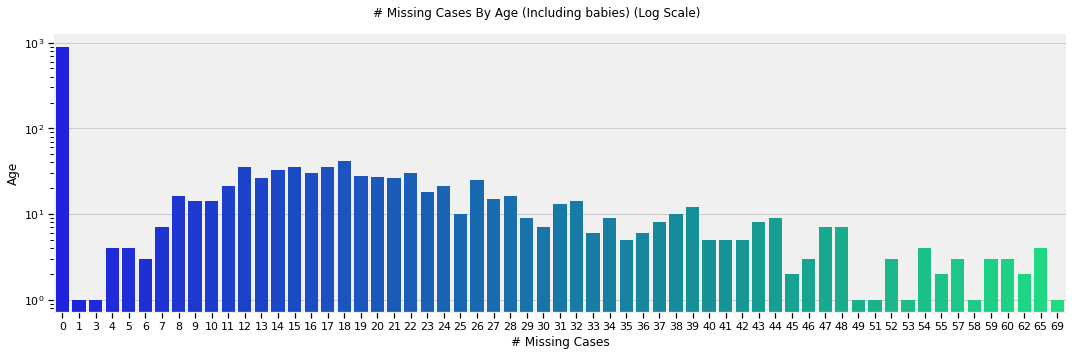

In [27]:
g = sns.catplot(x='current_age', data=missing,
                kind='count', height=5, aspect=3, palette='winter')
plt.yscale('log')
g.fig.suptitle('# Missing Cases By Age (Including babies) (Log Scale)')
g.set(xlabel='# Missing Cases', ylabel='Age')
plt.tight_layout()
plt.show()

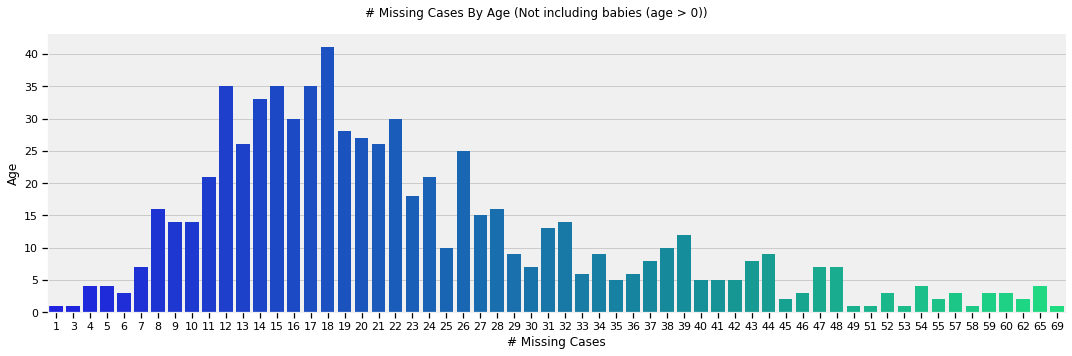

In [28]:
missing_no_0 = missing.loc[missing['current_age'] != 0]
g = sns.catplot(x='current_age', data=missing_no_0,
                kind='count', height=5, aspect=3, palette='winter')
g.fig.suptitle('# Missing Cases By Age (Not including babies (age > 0))')
g.set(xlabel='# Missing Cases', ylabel='Age')
plt.tight_layout()
plt.show()

#### Limitations/Assumptions: 
1. Assuming that any age value = 0 that doesn't mean it is null, but mean that it is a baby that was born few months ago (age < 1 year).
2. The `current_age` value is **not accurate at all** as this reflects his/her age till the year since this data is collected, or the case is recorded in Atfal Mafkoda website. So, this info is **not reliable** till we can retrive the timestamp of the recorded data. 

#### Side Decisions/Suggestions: 
1. We can use the same logic to make some awarness about giving more attention for the babies as they are most likely to go missing.
2. This information can help us in our research and numbers. 
3. We can build a GAN model to predict the face according the his/her expected current age. 
3. Build "Filter by Age" on filters section on the app. 

So, we can tell the user: 

##### **"لقد وجدنا أنه يكثر حالات فقد الأطفال في سن أقل من سنة، أي وهم ما زالوا رضّع، نرجوا منكي أن تحرصي على طفلك في هذا السن"** 

### Investigate on `number_of_images` of missing cases

In [29]:
missing['number_of_images'].describe()

count    1608.000000
mean        1.465174
std         1.363140
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        28.000000
Name: number_of_images, dtype: float64

In [30]:
print(f'Median number of images we have for the case: {missing["number_of_images"].median()}')

Median number of images we have for the case: 1.0


In [31]:
missing['number_of_images'].value_counts()

1     1191
2      268
3       72
4       37
5       13
0        8
8        5
7        4
14       2
6        2
28       1
16       1
10       1
12       1
11       1
15       1
Name: number_of_images, dtype: int64

In [32]:
print(f'Percentage of missing people who have 1 image: {(missing["number_of_images"] == 1).sum()/missing.shape[0]*100:.1f}%')

Percentage of missing people who have 1 image: 74.1%


In [33]:
print(f'Percentage of missing people who have more than 1 image: {(missing["number_of_images"] > 1).sum()/missing.shape[0]*100:.1f}%')

Percentage of missing people who have more than 1 image: 25.4%


##### Most of the missing cases have just 1 photo on the data **(74.1%)** --> Make the user to enter more than high resolution photo for the case (HOW MANY WE NEED? I think 4-5 will be good)

There are 8 cases that have no photo --> these are useless, we can drop them. 

#### Side Decisions/Suggestions: 
1. Most of the cases has only one photo, would it be enough? We can do ***Data Augmentation*** to solve this issue, it may increase the accuracy of our models. 
2. We should make the user enter more than one photo of the case so that it will make the model and the process of finding a match more accurate, more faster and reliable. 
3. The images of the case should be clear and high resolution. So, we can ask the user to do this.
4. The images should contain only the missing person, so that the model know where to focus and search. 

So we can ask the user while filling the form of missing or found case:

##### **"من فضلك أدخل أكثر من صورة ويفضل أن تكون واضحة ويوجد بها الشخص المفقود فقط"**

### Investigate on Dates ( `missing_date_ar`, `missing_date_en` & `year`) of missing cases

In [34]:
missing.head()

,name_arabic,name_english,government_arabic,government_english,current_age,number_of_images,missing_date_ar,missing_date_en,day,month,year
id,,,,,,,,,,,
1,داليا محمد نبقه,Dalia Mhmd Nbqh,الغربيه,Gharbia,11,1,٢٠-٠٩-٢٠١١,2011-09-20 00:00:00,20,9,2011
2,سلمي احمد مصطفي,Slmi Ahmd Mstfi,مفقود,Null,13,14,٢٢-٠٥-٢٠١٣,2013-05-22 00:00:00,22,5,2013
3,مؤمن اسلام محمد قمبر,Moumn Aslam Mhmd Qmbr,مفقود,Null,10,5,١٤-٠٦-٢٠١٤,2014-06-14 00:00:00,14,6,2014
4,ندا تامر عبد النبي,Nda Tamr Abd Alnbi,القليوبيه,Qualyubia,12,3,٢١-٠٧-٢٠١٥,2015-07-21 00:00:00,21,7,2015
5,مازن طارق حسن السمالوطي,Mazn Tarq Hsn Alsmalouti,المنيا,Minya,17,8,١٢-١١-٢٠١٠,2010-12-11 00:00:00,11,12,2010


In [35]:
missing['missing_date_ar'].sort_values().value_counts(sort=False)

               1
٠١-٠١-١٩٧٠    40
٠١-٠١-١٩٧٢     1
٠١-٠١-١٩٧٤     1
٠١-٠١-١٩٧٥     1
              ..
٣١-٠٨-٢٠١٦     1
٣١-٠٨-٢٠٢٠     3
٣١-١٢-٢٠١٥     4
٣١-١٢-٢٠١٩     1
٣١-١٢-٢٠٢٠     2
Name: missing_date_ar, Length: 1133, dtype: int64

##### 40 persons were missed in 1-1-1970 .. May be noisy data?

In [36]:
missing.loc[missing['missing_date_ar'] == "٠١-٠١-١٩٧٠"]

,name_arabic,name_english,government_arabic,government_english,current_age,number_of_images,missing_date_ar,missing_date_en,day,month,year
id,,,,,,,,,,,
362,اسلام محمد نبيل احمد احمد عبد الوهاب,Aslam Mhmd Nbil Ahmd Ahmd Abd Alouhab,مفقود,Null,15,1,٠١-٠١-١٩٧٠,1970-01-01 00:00:00,1,1,1970
643,ايمان صلاح انور,Aiman Slah Anour,مفقود,Null,52,1,٠١-٠١-١٩٧٠,1970-01-01 00:00:00,1,1,1970
709,رياض مخيمر السعيد المهدى,Riad Mkhimr Alsaid Almhda,مفقود,Null,0,0,٠١-٠١-١٩٧٠,1970-01-01 00:00:00,1,1,1970
736,احمد يحيي محمد محمد,Ahmd Ihii Mhmd Mhmd,الجيزه,Giza,0,0,٠١-٠١-١٩٧٠,1970-01-01 00:00:00,1,1,1970
742,داش محمد احمد عاشور,Dash Mhmd Ahmd Aashour,مفقود,Null,0,1,٠١-٠١-١٩٧٠,1970-01-01 00:00:00,1,1,1970
754,مصطفي علي رضوان,Mstfi Ali Rdouan,مفقود,Null,0,1,٠١-٠١-١٩٧٠,1970-01-01 00:00:00,1,1,1970
767,فارس عمر جاد الرب عمر,Fars Amr Gad Alrb Amr,مفقود,Null,0,1,٠١-٠١-١٩٧٠,1970-01-01 00:00:00,1,1,1970
773,سيد انور محمود,Sid Anour Mhmoud,مفقود,Null,0,1,٠١-٠١-١٩٧٠,1970-01-01 00:00:00,1,1,1970
776,احمد حسن على الصول,Ahmd Hsn Ala Alsoul,مفقود,Null,0,1,٠١-٠١-١٩٧٠,1970-01-01 00:00:00,1,1,1970


A big possible that it is a noisy data as the current age for these cases are 0 (assuming that the data is not collected or recorded on 1970 definitely 

In [37]:
missing_no_0 = missing.loc[missing['year'] != 0]
print(f'Missing cases on the data are gone missing between the year of {missing_no_0["year"].min()} and {missing_no_0["year"].max()}')

Missing cases on the data are gone missing between the year of 1969 and 2021


##### Missing cases are between years of 1969 and 2021

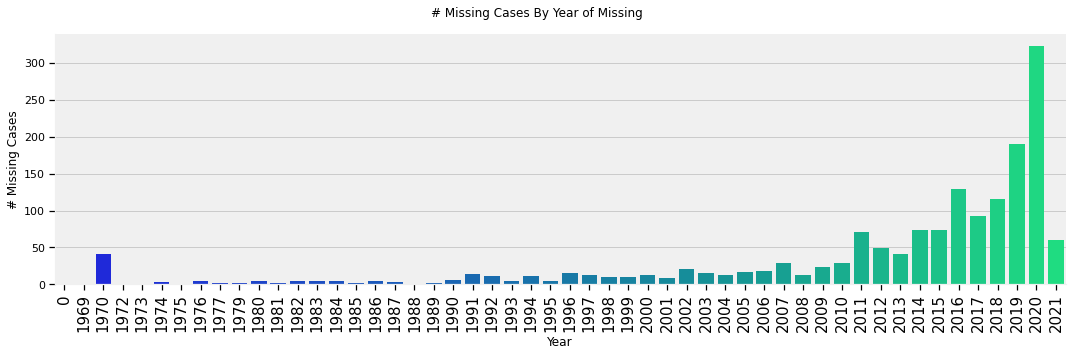

In [38]:
g = sns.catplot(x='year', data=missing,
                kind='count', height=5, aspect=3, palette='winter')
g.fig.suptitle('# Missing Cases By Year of Missing')
g.set(xlabel='Year', ylabel='# Missing Cases')
plt.xticks(rotation=90,fontsize=15)
plt.tight_layout()
plt.show()

##### Missing people numbers are increasning specially from 2010 to 2021

In [39]:
missing_g_2000 = (missing['year'] >= 2000).sum()
print(f'Number of missing cases after 2000: {missing_g_2000}')
print(f'Percentage of data: {missing_g_2000/missing.shape[0]*100:.1f}%')

Number of missing cases after 2009: 1420
Percentage of data: 88.3%


In [40]:
missing_g_2010 = (missing['year'] >= 2010).sum()
print(f'Number of missing cases after 2009: {missing_g_2010}')
print(f'Percentage of data: {missing_g_2010/missing.shape[0]*100:.1f}%')

Number of missing cases after 2009: 1247
Percentage of data: 77.5%


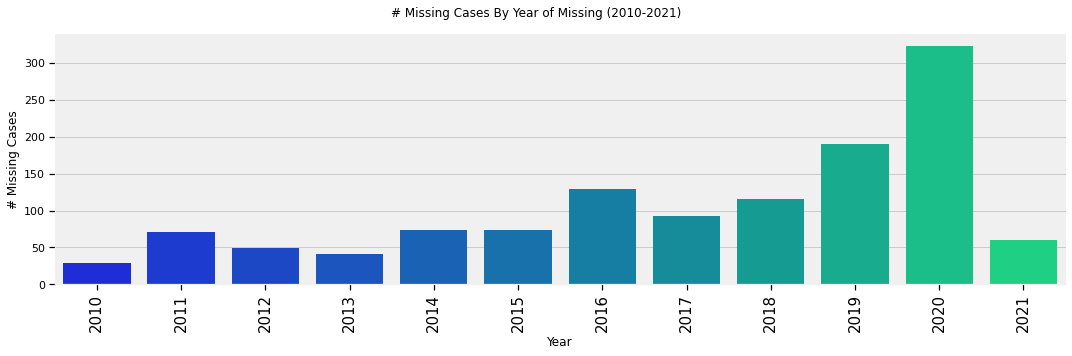

In [41]:
missin_gt_2010 = missing.loc[missing['year'] >= 2010]
g = sns.catplot(x='year', data=missin_gt_2010,
                kind='count', height=5, aspect=3, palette='winter')
g.fig.suptitle('# Missing Cases By Year of Missing (2010-2021)')
g.set(xlabel='Year', ylabel='# Missing Cases')
plt.xticks(rotation=90,fontsize=15)
plt.tight_layout()
plt.show()

In [42]:
missing_2020 = (missing["year"] == 2020).sum()
print(f'Number of missing cases reported on 2020 (year of COVID-19 Pandemic): {missing_2020} ')
print(f'Percentage of the data: {missing_2020/missing.shape[0]*100:.1f}%')

Number of missing cases reported on 2020 (year of COVID-19 Pandemic): 323 
Percentage of the data: 20.1%


##### 2020 recorded the maximum number of reporting cases . is there any impact of COVID-19 Pandemic on these stats? 

In [43]:
missing_pivot = pd.crosstab(index=missin_gt_2010["government_english"], columns=missin_gt_2010["year"])
missing_pivot

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
government_english,,,,,,,,,,,,
Al-Sharqia,2,2,0,1,2,2,3,6,7,6,18,4
Alexandria,2,3,1,1,1,4,5,5,8,10,22,5
Assiut,2,2,2,2,5,1,3,4,4,9,8,4
Aswan,0,1,0,0,3,1,2,1,2,1,3,1
Beheira,0,1,0,0,3,1,1,4,3,6,10,3
Beni Suef,0,1,0,0,1,0,1,3,4,6,3,0
Cairo,2,6,1,4,0,1,7,6,12,28,51,11
Dakahlia,1,2,1,1,2,1,4,4,5,7,18,3
Damietta,0,0,0,1,0,2,1,2,1,1,11,2


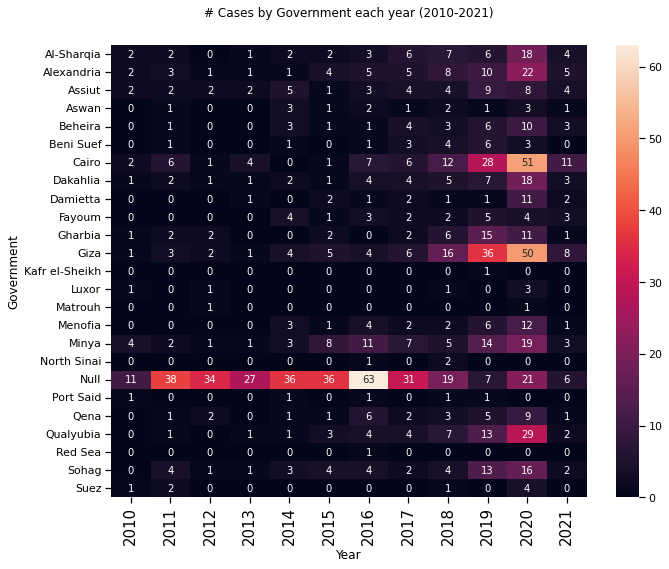

In [44]:
plt.figure(figsize=(10, 8))
g = sns.heatmap(missing_pivot, annot=True)
g.set_title('# Cases by Government each year (2010-2021)', y=1.05)
g.set(xlabel='Year', ylabel='Government')
plt.xticks(rotation=90,fontsize=15)
plt.tight_layout()
plt.show()

#### Side Decisions/Suggestions: 
1. Percentage of cases who are missing after 2010 represents most of the data **(77.5%)** , so we decided to drop any case that has missing data **before 2010**.
2. On our app, we will automatically close and discard any case that will last for 20 years as missing case, becasue there is possibility that the missing person has beed found but they forgot to close the case, or the facial features of the case are possible to change. 

So we can ask the user when his cases elapsed the time of lasting on the app (after 20 years):

##### **"نرجو منك تحديث حالة فقيدكم، هل تم إيجاده أما زال مفقوداً؟"**

### Extra Investigations/Analysis

#### MTCNN vs DlibCNN Speed (Seaborn)

In [45]:
cnn = pd.read_json('test.json', orient='columns')
cnn.head()

,mtcnn,mtcnn*,dlib,dlib*
0,2.29867,2.29867,16.83240,16.8324
1,1.43023,3.72891,1.85226,18.6847
2,0.75236,4.48128,2.42437,21.1090
3,1.01850,5.49978,2.85568,23.9647
4,1.90441,7.40420,116.70900,140.6730


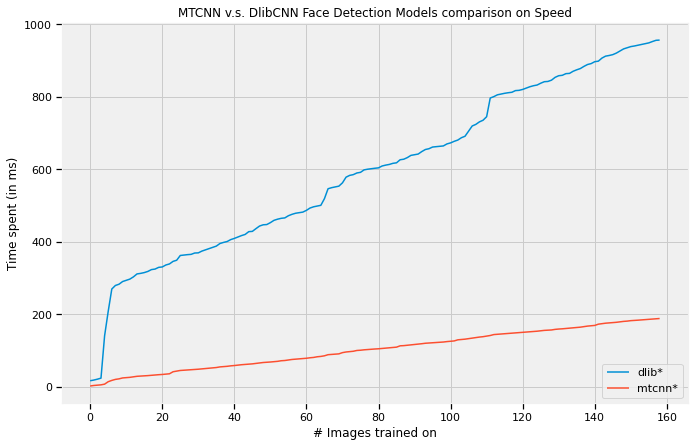

In [46]:
# * means the sum of time spent over 159 images
plt.figure(figsize=(10, 7))
plt.plot(cnn['dlib*'])
plt.plot(cnn['mtcnn*'])
plt.title('MTCNN v.s. DlibCNN Face Detection Models comparison on Speed')
plt.xlabel('# Images trained on')
plt.ylabel('Time spent (in ms)')
plt.legend(["dlib*", "mtcnn*"], loc ="lower right")
plt.show()

#### Investigate on effect of COVID-19 Pandemic on the number of missing cases.

The COVID-19 pandemic started near March 2020 with full quarantine and we returned to our life near October-November 2020 (peak time). Let's see number of cases on this time interval.

In [47]:
# Change the datatype of missing_date_en attribute
missing['missing_date_en'] = pd.to_datetime(missing['missing_date_ar']) 
covid_cases = missing.loc[(missing['missing_date_en'] >= pd.to_datetime('2020-03-01')) & (missing['missing_date_en'] < pd.to_datetime('2020-12-01'))]
covid_cases.head()

,name_arabic,name_english,government_arabic,government_english,current_age,number_of_images,missing_date_ar,missing_date_en,day,month,year
id,,,,,,,,,,,
654,سيف محمد فتحي,Sif Mhmd Fthi,الجيزه,Giza,14,1,٠٨-٠١-٢٠٢٠,2020-08-01,1,8,2020
663,مدحت فهيم بخيت,Mdht Fhim Bkhit,الاسكندريه,Alexandria,44,1,٠٨-٠٢-٢٠٢٠,2020-08-02,2,8,2020
677,محمد رمضان علي,Mhmd Rmdan Ali,الجيزه,Giza,34,1,٠٤-٠١-٢٠٢٠,2020-04-01,1,4,2020
678,عمرو جابر محمد جابر,Amrou Gabr Mhmd Gabr,القاهرة,Cairo,36,1,٠٣-٠١-٢٠٢٠,2020-03-01,1,3,2020
681,راشد عبد الرحيم راشد,Rashd Abd Alrhim Rashd,المنيا,Minya,15,1,٠٧-٠١-٢٠٢٠,2020-07-01,1,7,2020


In [48]:
print(f'Number of missing cases reported during COVID-19 first spread time: {covid_cases.shape[0]}')
print(f'Percentage of data: {covid_cases.shape[0]/missing.shape[0]*100:.1f}%')

Number of missing cases reported during COVID-19 first spread time: 253
Percentage of data: 15.7%


#### There is **253 cases** were reported during pandameic time only! 
#### This represents **15.7%** of the data. 

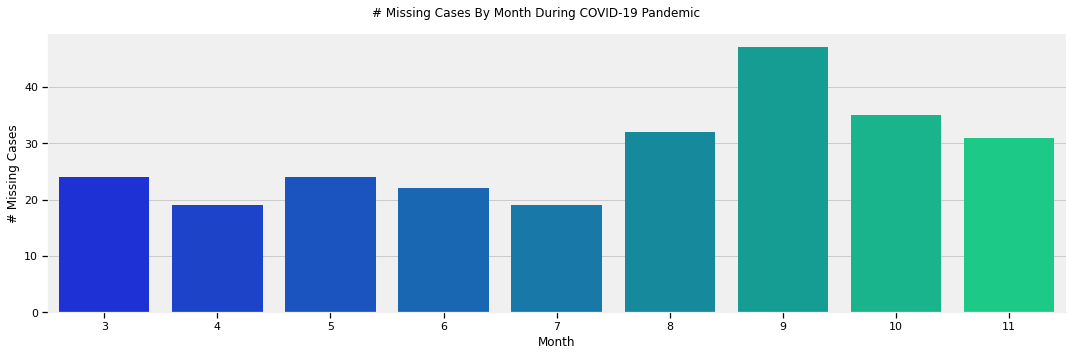

In [49]:
g = sns.catplot(x='month', data=covid_cases,
                kind='count', height=5, aspect=3, palette='winter')
g.fig.suptitle('# Missing Cases By Month During COVID-19 Pandemic')
g.set(xlabel='Month', ylabel='# Missing Cases')
plt.tight_layout()
plt.show()

#### I think there was an effect for the pandemic on the increasing number of missing cases on 2020